### Import Libraries and Load Data

Importing important libraries and the data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import os
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("C:/Users/ssss/Desktop/@@10/data/benin-malanville.csv")

In [7]:
df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


### 1. Summary Statistics & Missing-Value Report

In [2]:
# Overview of numeric columns
print("The description of the numeric columns:")
print(df.describe())

# Overview of categorical columns
print("\nThe description of the categorical columns:")
print(df.describe(include=['object']))# Display summary statistics for numeric columns

# Display missing value count for each column
print("\nMissing Value Count per Column:")
missing_values = df.isna().sum()
print(missing_values)

# Identify columns with more than 5% nulls
total_rows = len(df)
columns_with_high_nulls = missing_values[missing_values > 0.05 * total_rows]

if not columns_with_high_nulls.empty:
  print("\nColumns with more than 5% nulls:")
  print(columns_with_high_nulls)
else:
  print("\nNo columns with more than 5% nulls.")


The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

### 2. Outlier Detection

In [3]:
# Columns for Z-score calculation
zscore_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for the specified columns
for col in zscore_columns:
  if col in df.columns:
    # Ensure the column is numeric before calculating z-scores
    if pd.api.types.is_numeric_dtype(df[col]):
      df[f'{col}_zscore'] = zscore(df[col].dropna())
      # Flag rows with |Z| > 3
      outlier_rows = df[abs(df[f'{col}_zscore']) > 3]
      if not outlier_rows.empty:
        print(f"\nFound {len(outlier_rows)} rows with Z-score > 3 in '{col}'.")
        # Optionally, display the outlier rows
        # print(outlier_rows[[col, f'{col}_zscore']].head())
      else:
        print(f"\nNo rows with Z-score > 3 found in '{col}'.")
    else:
      print(f"\nColumn '{col}' is not numeric and cannot be used for Z-score calculation.")
  else:
    print(f"\nColumn '{col}' not found in the DataFrame for Z-score calculation.")



Found 89 rows with Z-score > 3 in 'GHI'.

No rows with Z-score > 3 found in 'DNI'.

Found 3738 rows with Z-score > 3 in 'DHI'.

Found 27 rows with Z-score > 3 in 'ModA'.

Found 63 rows with Z-score > 3 in 'ModB'.

Found 3109 rows with Z-score > 3 in 'WS'.

Found 3500 rows with Z-score > 3 in 'WSgust'.


### 2.1 Imputation

In [23]:
# Columns for Z-score calculation
zscore_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for the specified columns
for col in zscore_columns:
  if col in df.columns:
    # Ensure the column is numeric before calculating z-scores
    if pd.api.types.is_numeric_dtype(df[col]):
      df[f'{col}_zscore'] = zscore(df[col].dropna())
      # Flag rows with |Z| > 3
      outlier_rows = df[abs(df[f'{col}_zscore']) > 3]
      if not outlier_rows.empty:
        print(f"\nFound {len(outlier_rows)} rows with Z-score > 3 in '{col}'.")
        # Optionally, display the outlier rows
        # print(outlier_rows[[col, f'{col}_zscore']].head())
      else:
        print(f"\nNo rows with Z-score > 3 found in '{col}'.")
    else:
      print(f"\nColumn '{col}' is not numeric and cannot be used for Z-score calculation.")
  else:
    print(f"\nColumn '{col}' not found in the DataFrame for Z-score calculation.")


# Identify key columns for missing value handling
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Drop rows where essential columns are missing
# Be cautious with this step, as it can remove a lot of data
# df.dropna(subset=key_columns, inplace=True)
# print(f"\nDataFrame size after dropping rows with missing values in key columns: {len(df)}")

# Impute missing values in key columns using the median
print("\nImputing missing values in key columns with the median:")
for col in key_columns:
  if col in df.columns and df[col].isna().sum() > 0:
    # Ensure the column is numeric before imputation
    if pd.api.types.is_numeric_dtype(df[col]):
      median_value = df[col].median()
      df[col] = df[col].fillna(median_value)
      print(f"  Imputed missing values in '{col}' with median ({median_value}).")
    else:
      print(f"  Column '{col}' is not numeric and cannot be imputed with median.")
  elif col in df.columns:
    print(f"  Column '{col}' has no missing values.")
  else:
    print(f"  Column '{col}' not found in the DataFrame.")


# Display missing value count after imputation for the key columns
print("\nMissing Value Count per Key Column after imputation:")
print(df[key_columns].isna().sum())

# Display summary statistics again after cleaning
print("\nSummary Statistics for Numeric Columns after cleaning:")
print(df[zscore_columns].describe())


Found 89 rows with Z-score > 3 in 'GHI'.

No rows with Z-score > 3 found in 'DNI'.

Found 3738 rows with Z-score > 3 in 'DHI'.

Found 27 rows with Z-score > 3 in 'ModA'.

Found 63 rows with Z-score > 3 in 'ModB'.

Found 3109 rows with Z-score > 3 in 'WS'.

Found 3500 rows with Z-score > 3 in 'WSgust'.

Imputing missing values in key columns with the median:
  Column 'GHI' has no missing values.
  Column 'DNI' has no missing values.
  Column 'DHI' has no missing values.
  Column 'ModA' has no missing values.
  Column 'ModB' has no missing values.
  Column 'WS' has no missing values.
  Column 'WSgust' has no missing values.

Missing Value Count per Key Column after imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Summary Statistics for Numeric Columns after cleaning:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452    

In [26]:
# Identify columns to check for outliers using Z-score
columns_to_check_zscore = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for the specified columns, dropping NaNs for calculation
z_scores = df[columns_to_check_zscore].apply(lambda x: zscore(x.dropna()))

# Create a boolean mask for outliers (|Z| > 3)
outliers_mask = (z_scores.abs() > 3)

# Check if any of the specified columns in a row are outliers
df['is_zscore_outlier'] = outliers_mask.any(axis=1)

# Optionally drop rows identified as Z-score outliers
# Be cautious, this removes data based on the Z-score threshold across specified columns
df_cleaned_zscore = df[~df['is_zscore_outlier']].copy()

print(f"\nDataFrame size before Z-score outlier removal: {len(df)}")
print(f"DataFrame size after removing rows with Z-score > 3 in specified columns: {len(df_cleaned_zscore)}")

# Optional: Drop the 'is_zscore_outlier' flag column if no longer needed
if 'is_zscore_outlier' in df_cleaned_zscore.columns:
  df_cleaned_zscore.drop(columns=['is_zscore_outlier'], inplace=True)
  print("Dropped 'is_zscore_outlier' column.")

# Display summary statistics for the dataframe after Z-score outlier removal
print("\nSummary Statistics for Numeric Columns after removing Z-score outliers across multiple columns:")
print(df_cleaned_zscore[columns_to_check_zscore].describe())


DataFrame size before Z-score outlier removal: 525600
DataFrame size after removing rows with Z-score > 3 in specified columns: 517860
Dropped 'is_zscore_outlier' column.

Summary Statistics for Numeric Columns after removing Z-score outliers across multiple columns:
                 GHI            DNI            DHI           ModA  \
count  517860.000000  517860.000000  517860.000000  517860.000000   
mean      236.234508     166.896673     111.656477     232.393310   
std       328.288787     262.081997     153.099749     324.256767   
min       -11.100000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         0.700000      -0.100000       0.500000       3.400000   
75%       468.700000     316.300000     212.000000     448.700000   
max      1233.000000     952.300000     591.400000    1205.100000   

                ModB             WS         WSgust  
count  517860.000000  517860.000000  517860.000000  
mea

In [ ]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


### Data Export

In [ ]:
# To work on all other data and Usablity fetch the country name from the filename (assuming the format is <country>-<location>.csv)
filename = 'benin-malanville.csv'
country = filename.split('-')[0]

# Define the output directory and filename
output_dir = 'data'
output_filename = f'{country}_clean.csv'
output_filepath = os.path.join(output_dir, output_filename)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
  os.makedirs(output_dir)
  print(f"Created directory: {output_dir}")

# Save the cleaned DataFrame to CSV
# Use index=False to prevent writing the DataFrame index as a column
try:
  df.to_csv(output_filepath, index=False)
  print(f"\nCleaned data saved to: {output_filepath}")
except Exception as e:
  print(f"Error saving cleaned data: {e}")


Created directory: data

Cleaned data saved to: data\benin_clean.csv


### 3. Univariate Visualizations

#### Time Series Analysis


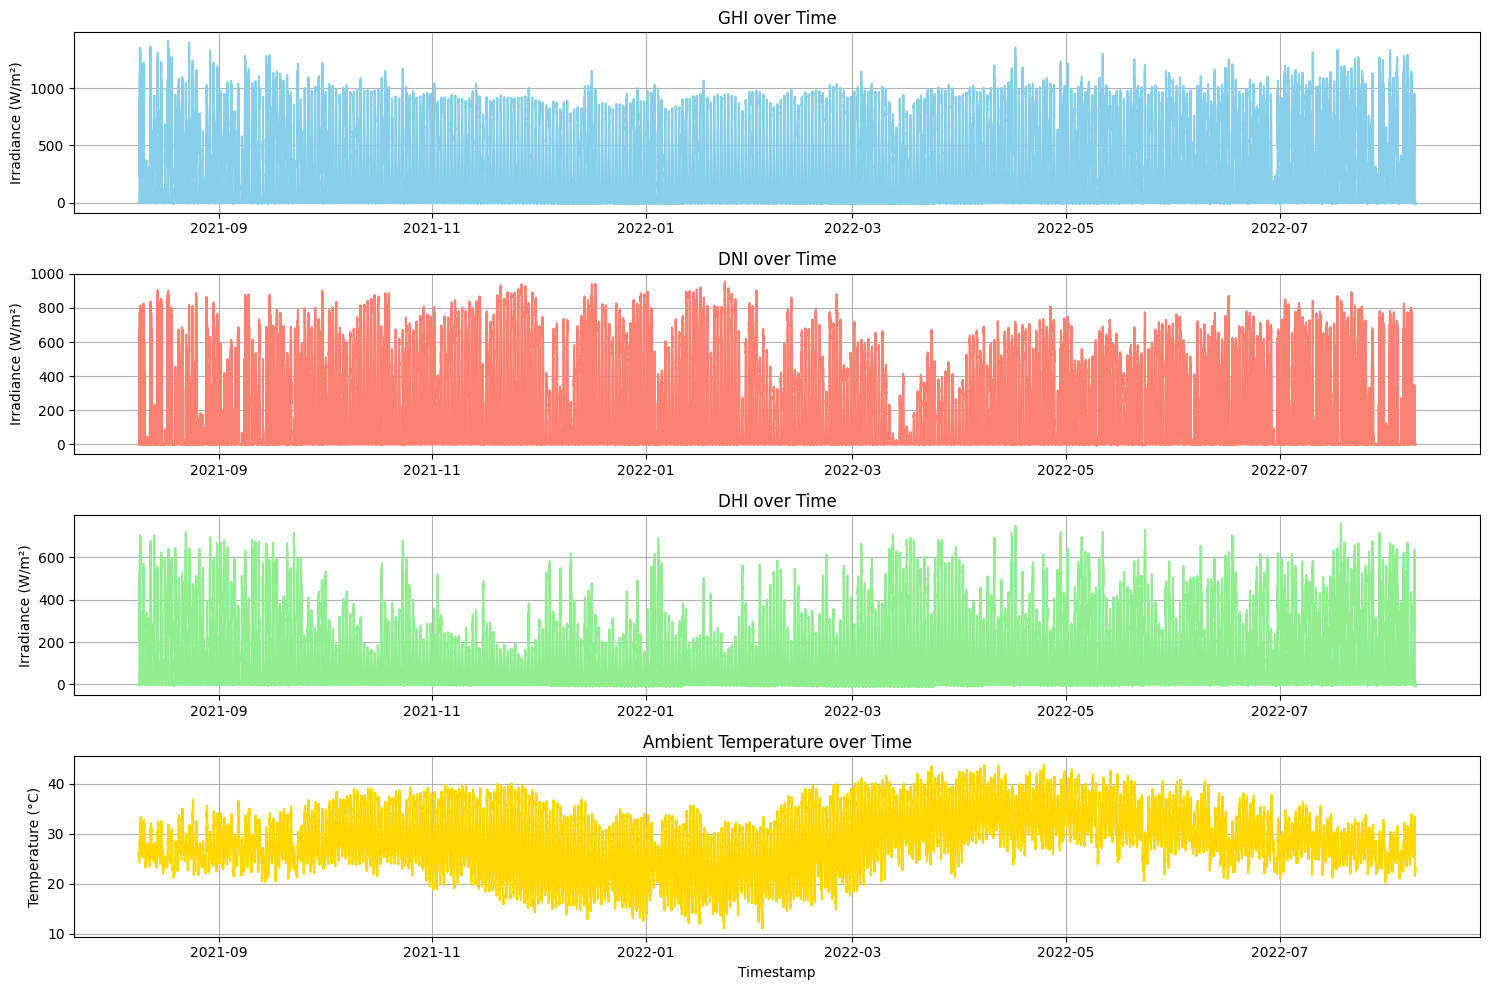

In [ ]:
# Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.
# First we need to Ensure Timestamp is datetime

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index for easier plotting
df = df.set_index('Timestamp')

# Plot GHI, DNI, DHI, Tamb vs Timestamp
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='skyblue')
plt.ylabel('Irradiance (W/m²)')
plt.title('GHI over Time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='salmon')
plt.ylabel('Irradiance (W/m²)')
plt.title('DNI over Time')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='lightgreen')
plt.ylabel('Irradiance (W/m²)')
plt.title('DHI over Time')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='gold')
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature over Time')
plt.xlabel('Timestamp')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\ssss\AppData\Local\Temp\ipykernel_10572\1377099673.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


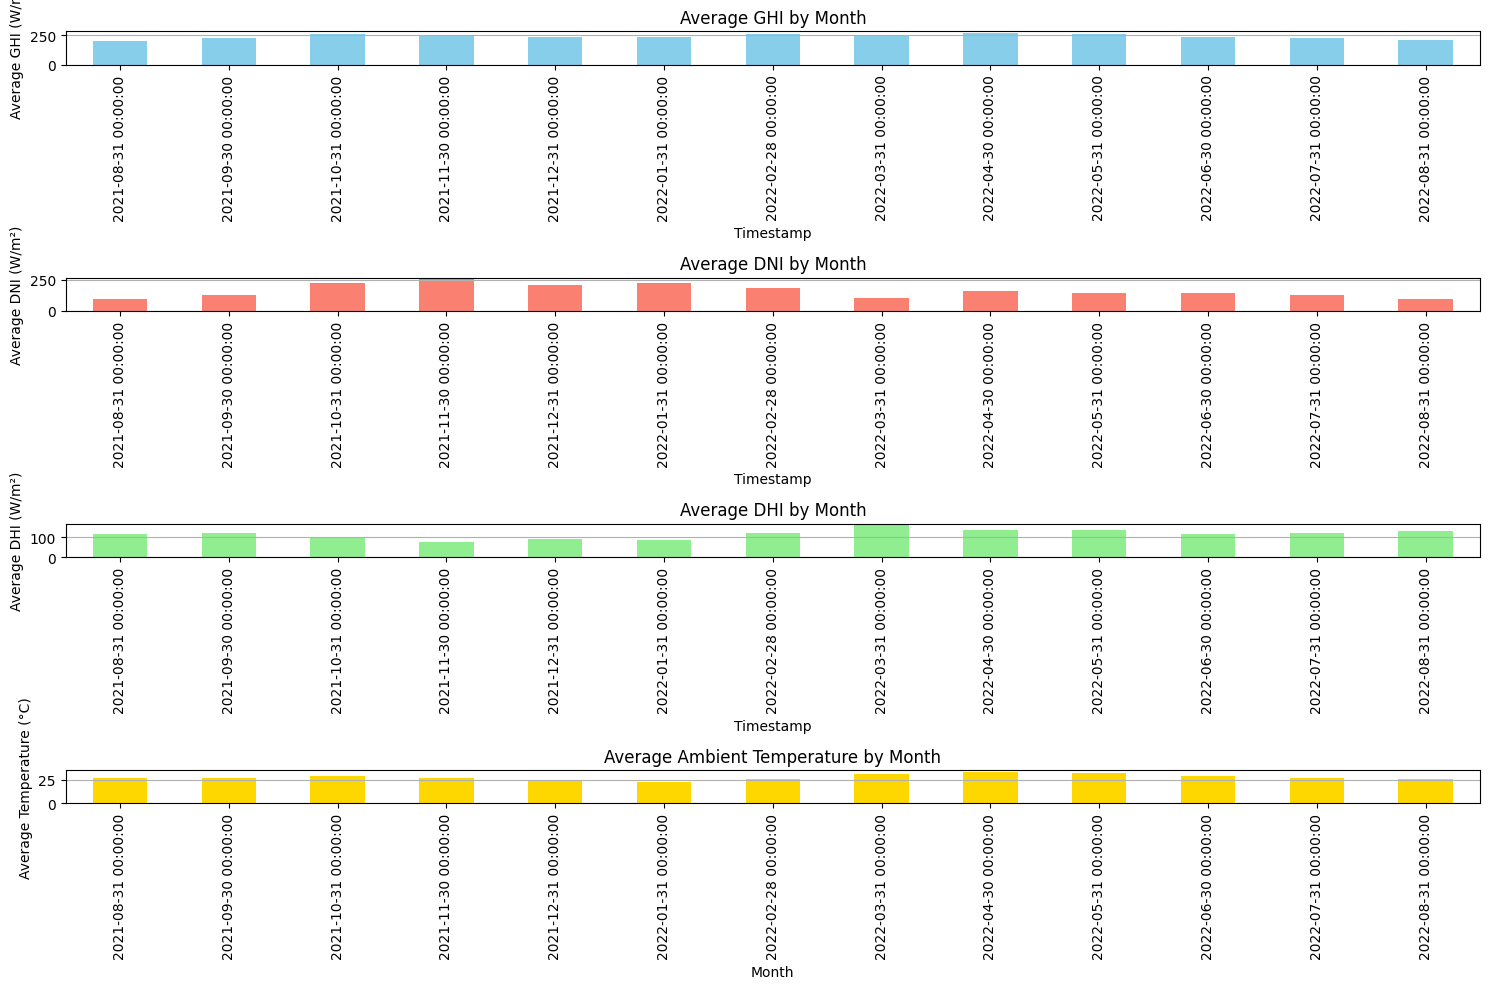

In [ ]:
#Observe patterns by month - Aggregate data by month
 
df['Month'] = df.index.month
df_monthly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
df_monthly['GHI'].plot(kind='bar', color='skyblue')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Month')
plt.grid(axis='y')

plt.subplot(4, 1, 2)
df_monthly['DNI'].plot(kind='bar', color='salmon')
plt.ylabel('Average DNI (W/m²)')
plt.title('Average DNI by Month')
plt.grid(axis='y')

plt.subplot(4, 1, 3)
df_monthly['DHI'].plot(kind='bar', color='lightgreen')
plt.ylabel('Average DHI (W/m²)')
plt.title('Average DHI by Month')
plt.grid(axis='y')

plt.subplot(4, 1, 4)
df_monthly['Tamb'].plot(kind='bar', color='gold')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Ambient Temperature by Month')
plt.xlabel('Month')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

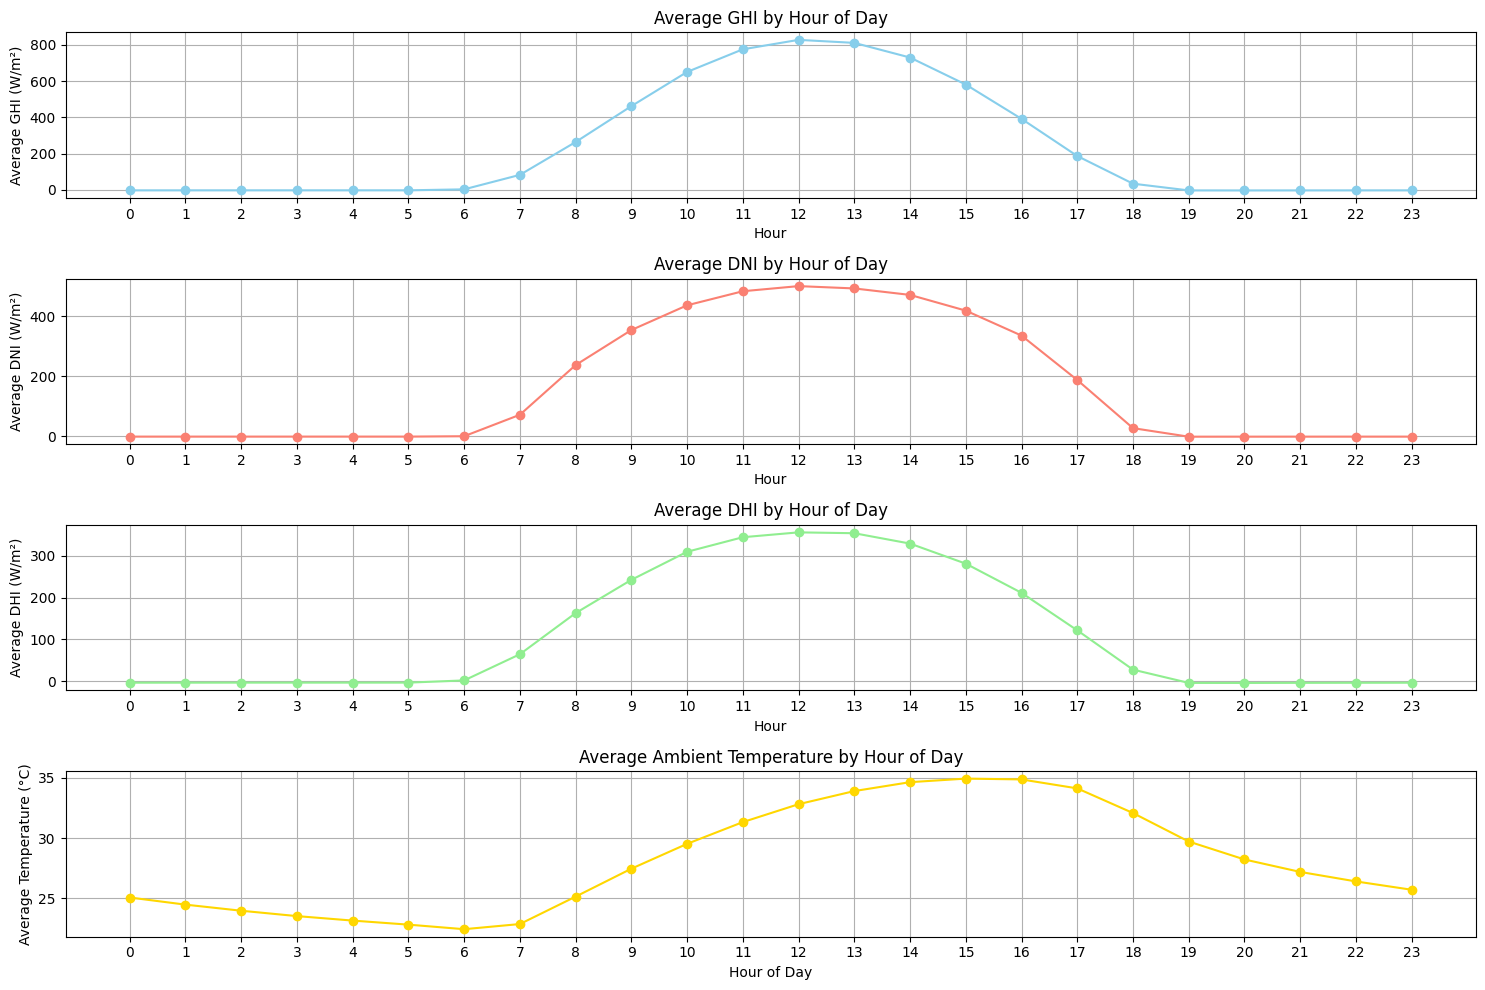

In [ ]:
# Trends throughout day - Aggregate data by time of day (e.g., hourly average)
df['Hour'] = df.index.hour
df_hourly = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
df_hourly['GHI'].plot(kind='line', marker='o', color='skyblue')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Hour of Day')
plt.xticks(df_hourly.index)
plt.grid(True)

plt.subplot(4, 1, 2)
df_hourly['DNI'].plot(kind='line', marker='o', color='salmon')
plt.ylabel('Average DNI (W/m²)')
plt.title('Average DNI by Hour of Day')
plt.xticks(df_hourly.index)
plt.grid(True)

plt.subplot(4, 1, 3)
df_hourly['DHI'].plot(kind='line', marker='o', color='lightgreen')
plt.ylabel('Average DHI (W/m²)')
plt.title('Average DHI by Hour of Day')
plt.xticks(df_hourly.index)
plt.grid(True)

plt.subplot(4, 1, 4)
df_hourly['Tamb'].plot(kind='line', marker='o', color='gold')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Ambient Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.xticks(df_hourly.index)
plt.grid(True)

plt.tight_layout()
plt.show()


Anomalies detected (Z-score > 3 or < -3):
GHI anomalies:
                        GHI  GHI_zscore
Timestamp                              
2021-08-09 11:12:00  1274.0    3.120942
2021-08-09 11:15:00  1349.0    3.347438
2021-08-09 11:17:00  1334.0    3.302139
2021-08-09 14:10:00  1253.0    3.057523
2021-08-09 14:11:00  1324.0    3.271939

DNI anomalies:
Empty DataFrame
Columns: [DNI, DNI_zscore]
Index: []

DHI anomalies:
                       DHI  DHI_zscore
Timestamp                             
2021-08-09 11:11:00  610.6    3.120790
2021-08-09 11:12:00  615.2    3.149777
2021-08-09 11:13:00  612.8    3.134653
2021-08-09 11:14:00  593.2    3.011143
2021-08-09 11:15:00  618.0    3.167421

Tamb anomalies:
Empty DataFrame
Columns: [Tamb, Tamb_zscore]
Index: []


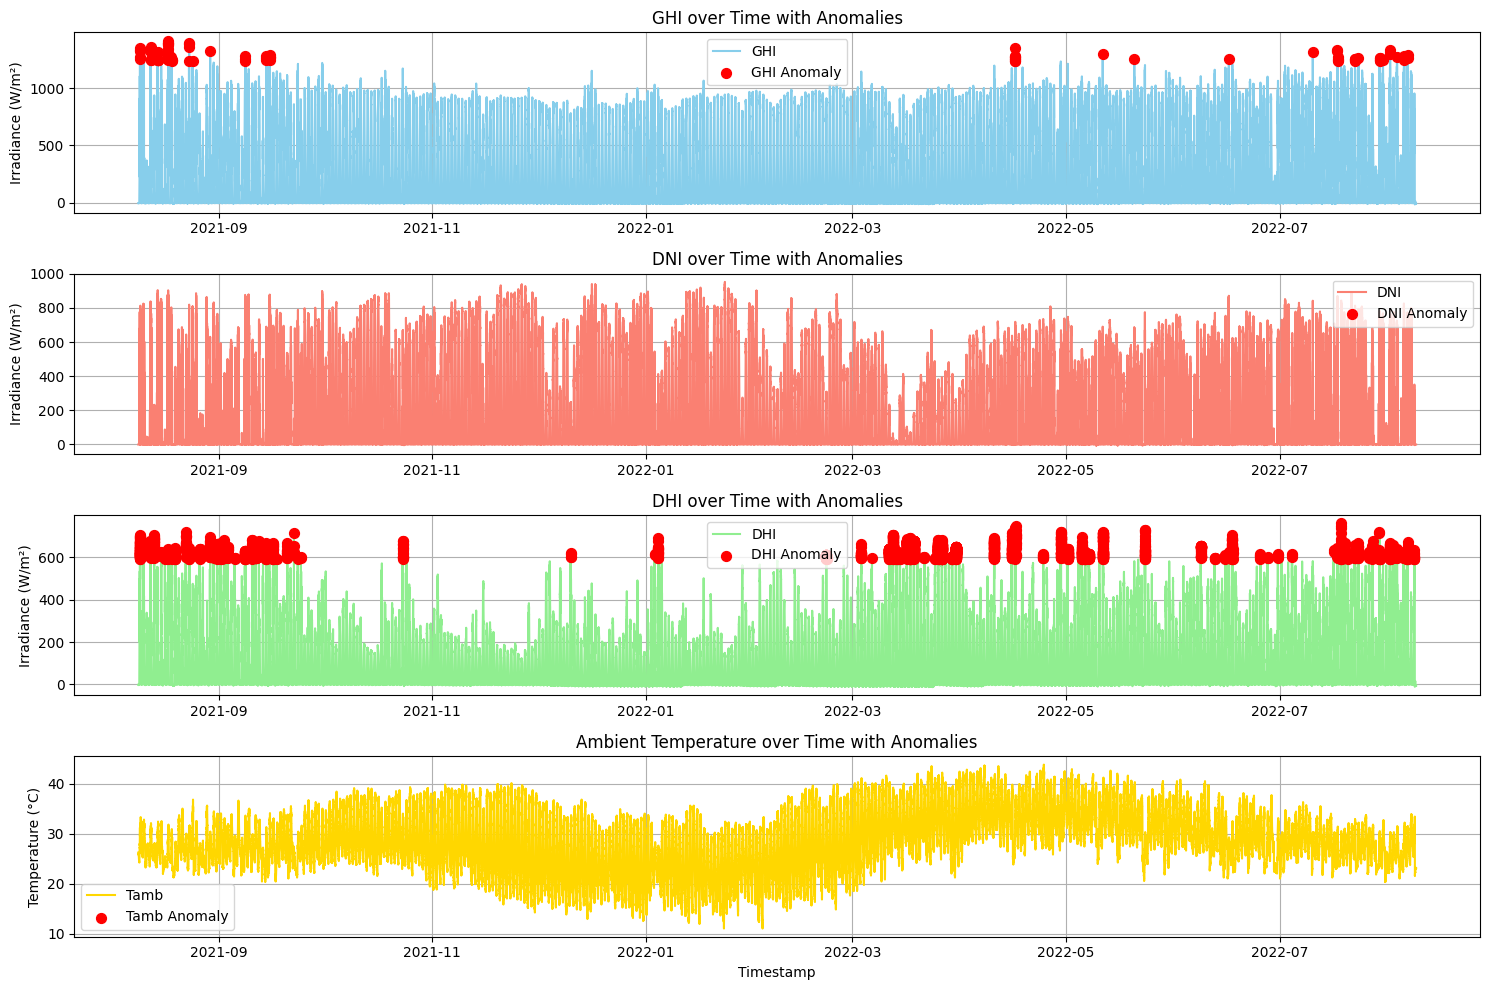

In [ ]:
# Trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations.
# Anomalies - Simple Z-score outlier detection
# Calculate Z-scores for relevant columns

df['GHI_zscore'] = zscore(df['GHI'])
df['DNI_zscore'] = zscore(df['DNI'])
df['DHI_zscore'] = zscore(df['DHI'])
df['Tamb_zscore'] = zscore(df['Tamb'])

# Define threshold for anomalies (e.g., Z-score > 3 or < -3)
z_threshold = 3

# Find anomalies
anomalies_ghi = df[abs(df['GHI_zscore']) > z_threshold]
anomalies_dni = df[abs(df['DNI_zscore']) > z_threshold]
anomalies_dhi = df[abs(df['DHI_zscore']) > z_threshold]
anomalies_tamb = df[abs(df['Tamb_zscore']) > z_threshold]

print("\nAnomalies detected (Z-score > {} or < {}):".format(z_threshold, -z_threshold))
print("GHI anomalies:")
print(anomalies_ghi[['GHI', 'GHI_zscore']].head())

print("\nDNI anomalies:")
print(anomalies_dni[['DNI', 'DNI_zscore']].head())

print("\nDHI anomalies:")
print(anomalies_dhi[['DHI', 'DHI_zscore']].head())

print("\nTamb anomalies:")
print(anomalies_tamb[['Tamb', 'Tamb_zscore']].head())

# Optional: Visualize anomalies on the time series plots
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='skyblue')
plt.scatter(anomalies_ghi.index, anomalies_ghi['GHI'], color='red', label='GHI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('GHI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='salmon')
plt.scatter(anomalies_dni.index, anomalies_dni['DNI'], color='red', label='DNI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('DNI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='lightgreen')
plt.scatter(anomalies_dhi.index, anomalies_dhi['DHI'], color='red', label='DHI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('DHI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='gold')
plt.scatter(anomalies_tamb.index, anomalies_tamb['Tamb'], color='red', label='Tamb Anomaly', s=50, zorder=5)
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature over Time with Anomalies')
plt.xlabel('Timestamp')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Cleaning Impact


Average ModA and ModB grouped by Cleaning flag:
                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


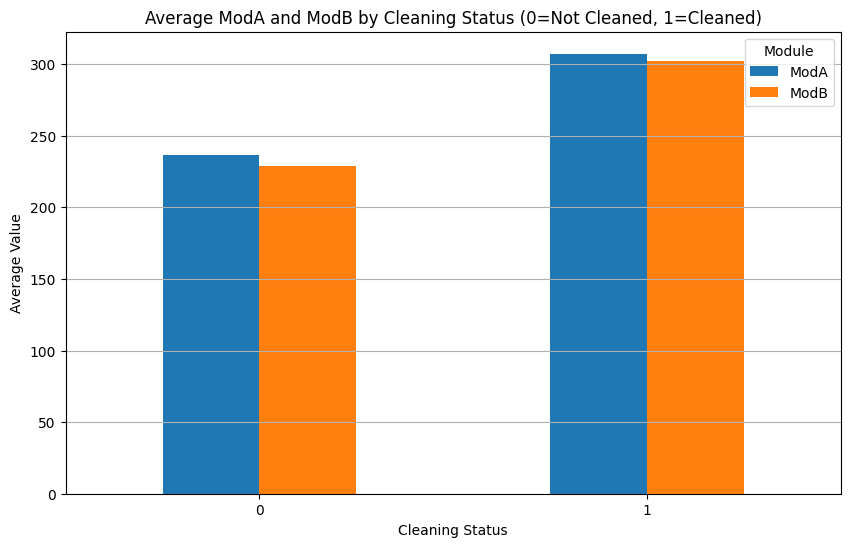

In [ ]:
# Ensuring the column existance {'Cleaning' column} exists and is numeric 
#The aim is to prevent errors and ensure the column is numeric before proceeding with calculations

if 'Cleaning' not in df.columns:
  print("Error: 'Cleaning' column not found in the DataFrame.")
else:
  # Convert 'Cleaning' column to numeric (if it's not already)
  df['Cleaning'] = pd.to_numeric(df['Cleaning'], errors='coerce')

  # Drop rows where 'Cleaning' could not be converted to numeric
  df.dropna(subset=['Cleaning'], inplace=True)

  # Ensure 'ModA' and 'ModB' columns exist
  if 'ModA' not in df.columns or 'ModB' not in df.columns:
    print("Error: 'ModA' or 'ModB' column not found in the DataFrame.")
  else:
    # Group by the 'Cleaning' column and calculate the mean of 'ModA' and 'ModB'
    cleaning_grouped = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

    print("\nAverage ModA and ModB grouped by Cleaning flag:")
    print(cleaning_grouped)

    # Plotting the results
    cleaning_grouped.plot(kind='bar', figsize=(10, 6))
    plt.title('Average ModA and ModB by Cleaning Status (0=Not Cleaned, 1=Cleaned)')
    plt.xlabel('Cleaning Status')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.legend(title='Module')
    plt.show()

### Correlation & Relationship Analysis


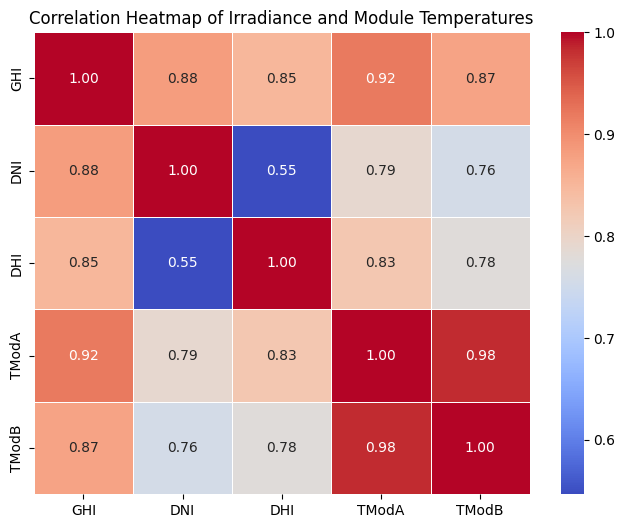

In [ ]:
# Correlation Analysis - Heatmap
#Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)

# Select the relevant columns for correlation
correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Irradiance and Module Temperatures')
plt.show()

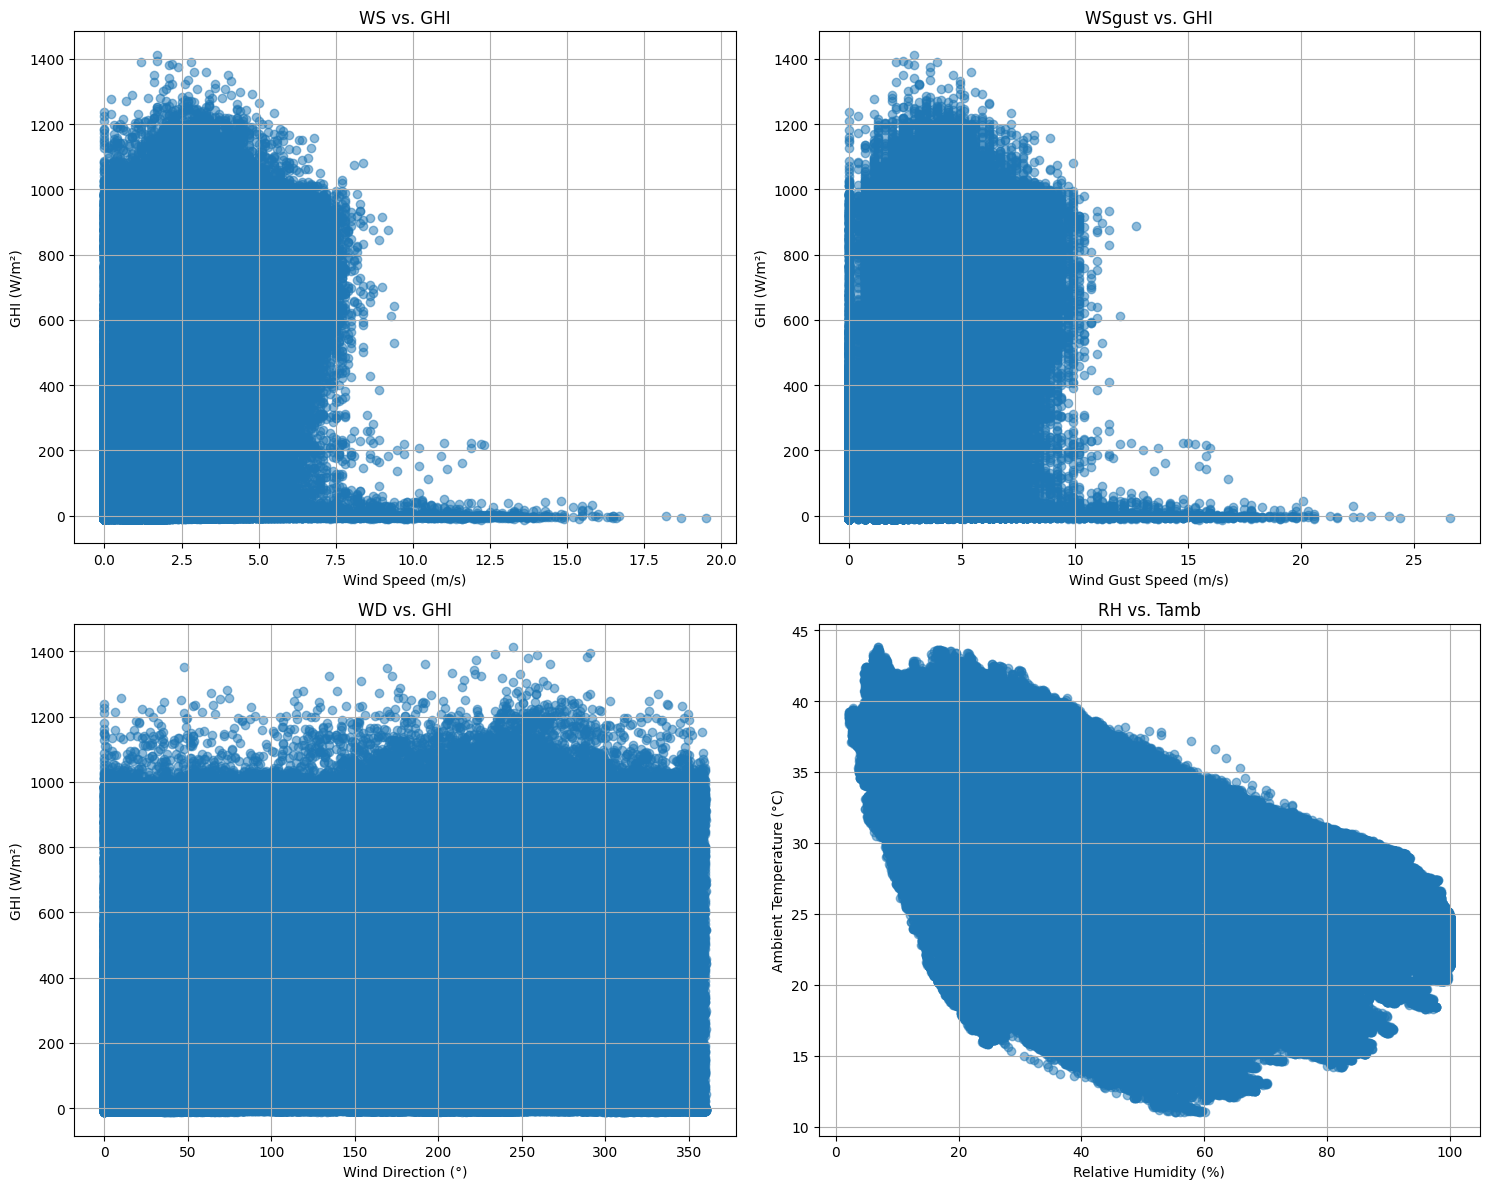

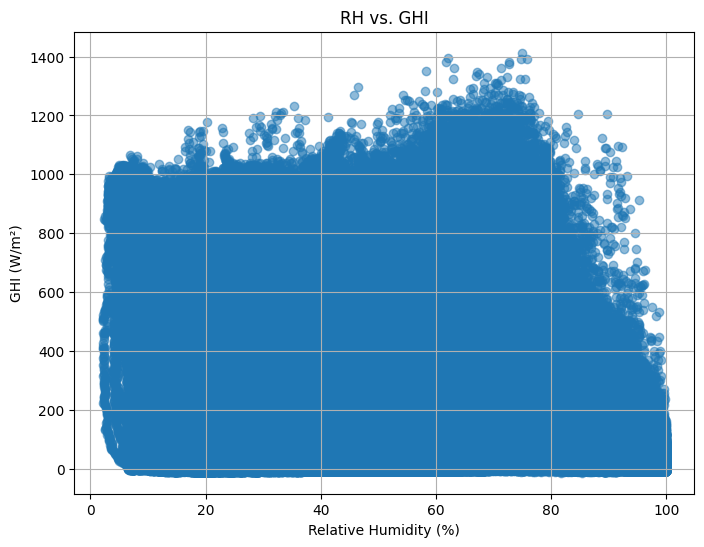

In [13]:
# Scatter plots
plt.figure(figsize=(15, 12))

# WS vs. GHI
plt.subplot(2, 2, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('WS vs. GHI')
plt.grid(True)

# WSgust vs. GHI
plt.subplot(2, 2, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('WSgust vs. GHI')
plt.grid(True)

# WD vs. GHI
plt.subplot(2, 2, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Direction (°)')
plt.ylabel('GHI (W/m²)')
plt.title('WD vs. GHI')
plt.grid(True)

# RH vs. Tamb
plt.subplot(2, 2, 4)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs. Tamb')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
# RH vs. GHI
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. GHI')
plt.grid(True)
plt.show()

### Wind & Distribution Analysis


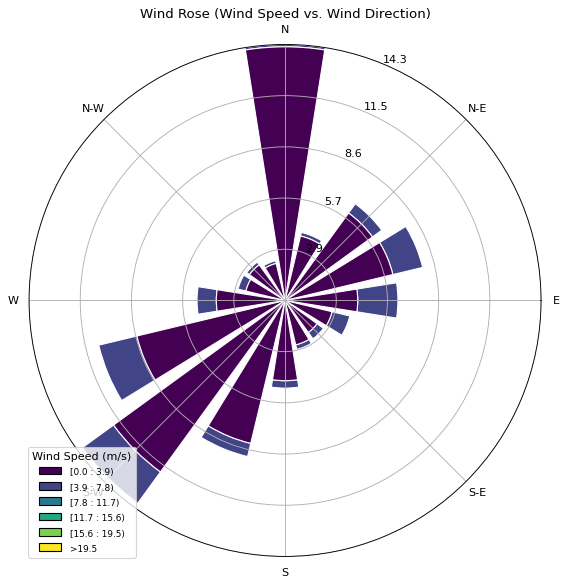

In [15]:
# Ensure 'WS' and 'WD' columns exist
if 'WS' not in df.columns or 'WD' not in df.columns:
  print("Error: 'WS' or 'WD' column not found in the DataFrame.")
else:
  # Create a WindroseAxes instance
  ax = WindroseAxes.from_ax()

  # Plot the wind rose using WS and WD data
  ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')

  # Set the title
  ax.set_title('Wind Rose (Wind Speed vs. Wind Direction)')

  # Add a legend
  ax.set_legend(title='Wind Speed (m/s)')

  # Display the plot
  plt.show()

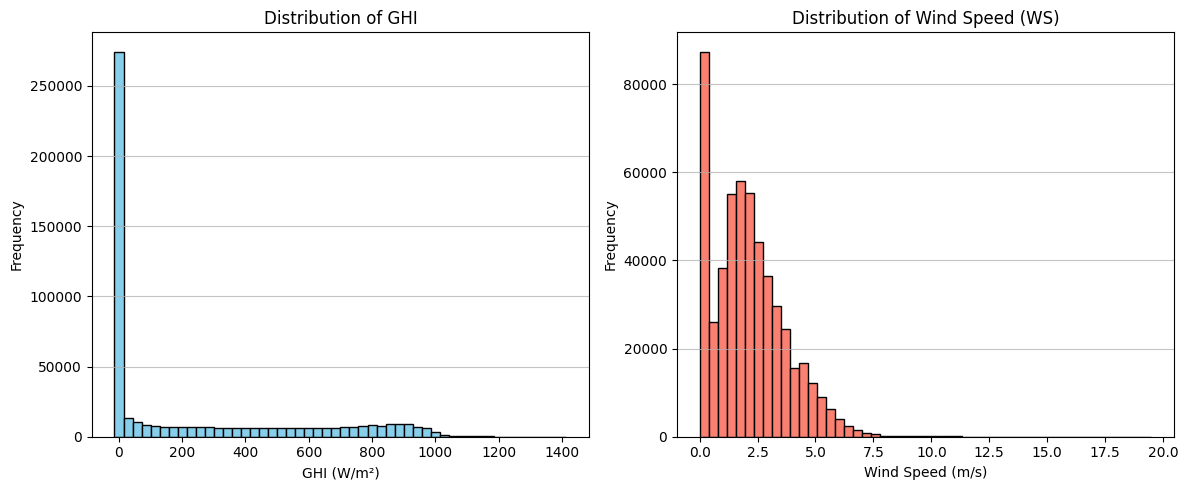

In [16]:
# Histograms for GHI and WS
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.title('Distribution of GHI')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed (WS)')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### Temperature Analysis


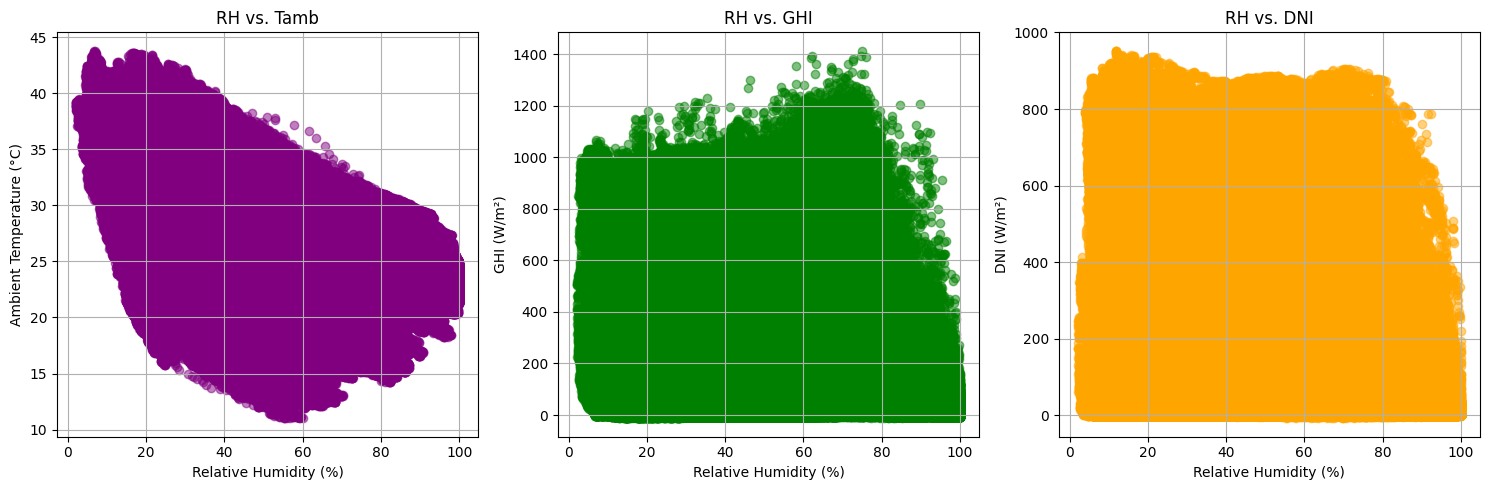


Correlation of Relative Humidity with other variables:
RH      1.000000
Tamb   -0.414842
GHI    -0.360029
DNI    -0.373475
DHI    -0.285018
Name: RH, dtype: float64


In [ ]:
# Examine how relative humidity (RH) might influence temperature readings and solar radiation

# Analyze the relationship between RH and Temperature (Tamb) and Solar Radiation (GHI, DNI, DHI)
plt.figure(figsize=(15, 5))

# RH vs. Tamb
plt.subplot(1, 3, 1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='purple')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs. Tamb')
plt.grid(True)

# RH vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5, color='green')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. GHI')
plt.grid(True)

# RH vs. DNI
plt.subplot(1, 3, 3)
plt.scatter(df['RH'], df['DNI'], alpha=0.5, color='orange')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.title('RH vs. DNI')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print correlations between RH and other variables
print("\nCorrelation of Relative Humidity with other variables:")
print(df[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()['RH'])

### Bubble Chart


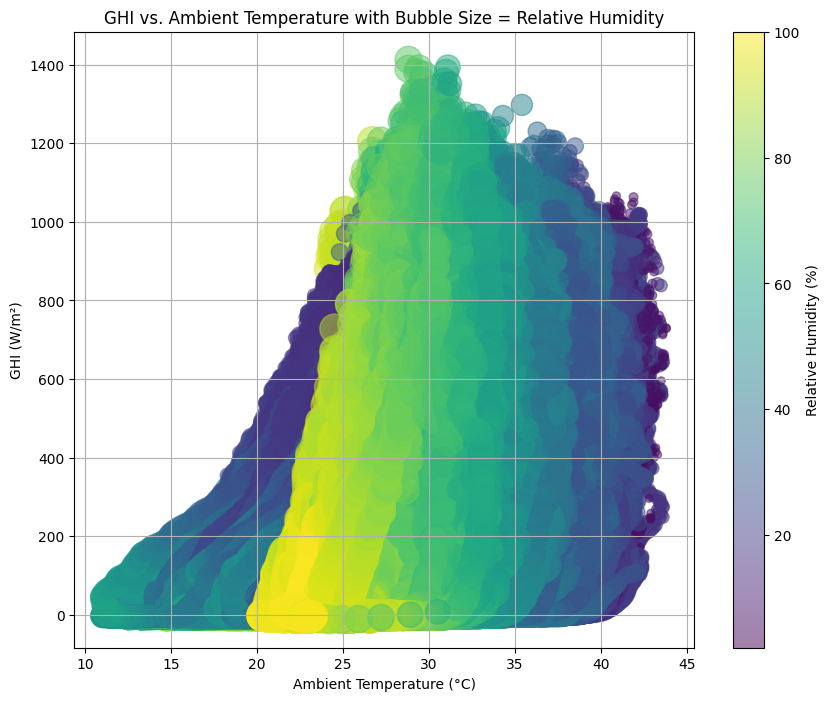

In [19]:
# GHI vs. Tamb with bubble size = RH 
plt.figure(figsize=(10, 8))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*5, alpha=0.5, c=df['RH'], cmap='viridis')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Ambient Temperature with Bubble Size = Relative Humidity')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()
plt.show()